In [1]:
import tensorflow as tf
import numpy as np
from pandas import DataFrame as df
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

In [2]:
TRAINING_STEPS = 100
LEARNING_RATE = 0.0001

In [15]:
x_data = np.linspace(0, 10, 20) + np.random.uniform(-1.5, 1.5, 20)
y_label = np.linspace(0, -10, 20) + np.random.uniform(-2, 2, 20)

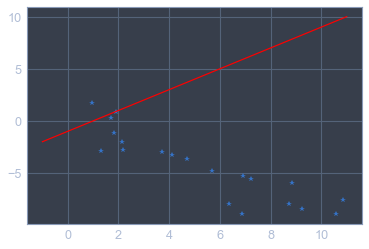

In [16]:
plt.plot(x_data, y_label, '*')
x_start = np.linspace(-1, 11, 2)
y_start = 1 * x_start + (-1)
plt.plot(x_start,y_start, 'red')

Tying to solve:

y = mx + b

In [17]:
m = tf.Variable(1.0)
b = tf.Variable(1.0)
init = tf.global_variables_initializer()

error = 0
for x, y in zip(x_data, y_label):
    y_guess = m * x + b
    error += (y - y_guess ) ** 2 # We want to minimize this error

In [18]:
with tf.Session() as sess:
    sess.run(init)
    print(error.eval())

3060.9312


In [19]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=LEARNING_RATE)
train = optimizer.minimize(error)

3060.9312 1.0 1.0
2194.542 0.6964818 0.9572937
1576.7689 0.4401925 0.92118084
1136.2699 0.22378404 0.8906357
822.1747 0.04105176 0.86479217
42.319912 -0.92156774 0.72347283
41.652172 -0.948509 0.711649
41.627842 -0.9478424 0.70388734


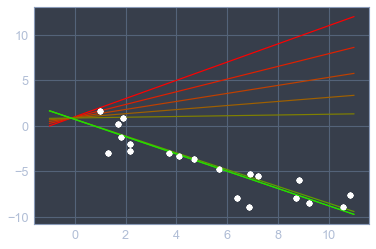

In [20]:
with tf.Session() as sess:
    sess.run(init)
    r = 1
    g = 0
    for i in range(TRAINING_STEPS):
        if i < 5 or i % 25 == 0:
            print(error.eval(), m.eval(), b.eval())
            x_test = np.linspace(-1, 11, 2)
            y_pred = m.eval() * x_test + b.eval()

            plt.plot(x_test, y_pred, color=(r,g,0,1))
            plt.plot(x_data, y_label, 'o', color='white')
            r -= (TRAINING_STEPS / 8) / 100
            g+= (TRAINING_STEPS / 8) / 100
        reuslt = sess.run(train)
    final_slope, final_intercept = sess.run([m,b])